#Table of Contents
* [1. Web Scraping](#1.-Web-Scraping)
* [2. Checking data](#2.-Checking-data)

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import random
import json
import statsmodels.graphics.tsaplots as tsaplots
import pymc as pm

C:\Users\Zhi Qian\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [202]:
# from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries.
import requests
from datetime import datetime
from dateutil import parser
from collections import Counter
from itertools import groupby
import pymc as pm

# 1. IMDB Scraping

In [33]:
def IMDB_scrape_movie(movie_code):
    rating_list = []
    index = 0
    
    while True:
        page=requests.get("http://www.imdb.com/title/"+movie_code+"/reviews-index?start="+str(index))
        soup = BeautifulSoup(page.text, "html.parser")
        reviews = soup.find_all("td", attrs= {"class":"comment-summary"})
        
        #if there are no more reviews to be scraped
        if len(reviews) == 0:
            break
        counter = 0
        
        #get the scores for each review
        for review in reviews:
            if review.find("img", attrs={"width":102}):
                rating_list.append(int(review.find("img", attrs={"width":102})['alt'].split('/')[0]))
        index = index+50
    return rating_list

In [35]:
dreamworks_imdb ={}
dreamworks_imdb['kung_fu_panda_3'] = 'tt2267968'
dreamworks_imdb['Home']= 'tt2224026'
dreamworks_imdb['Penguins of Madagascar'] = 'tt1911658'
dreamworks_imdb['How To Train Your Dragon 2'] = 'tt1646971'
dreamworks_imdb["Mr Peabody and Sherman"] = 'tt0864835'
dreamworks_imdb['Turbo'] = 'tt0864835'
dreamworks_imdb['The Croods'] = "tt0481499"
dreamworks_imdb['Rise of the Guardians'] = "tt1446192"
dreamworks_imdb["Madagascar 3"] = "tt1277953"
dreamworks_imdb["Puss in Boots"] = "tt0448694"

dreamworks_imdb_ratings = {}
for movie in dreamworks_imdb:
    dreamworks_imdb_ratings[movie] = IMDB_scrape_movie(dreamworks_imdb[movie])

print dreamworks_imdb_ratings

{'Turbo': [9, 9, 9, 7, 8, 7, 9, 7, 6, 8, 2, 9, 8, 9, 8, 8, 9, 9, 8, 9, 7, 7, 9, 7, 7, 8, 8, 7, 8, 9, 7, 7, 7, 9, 9, 8, 7, 7, 10, 9, 10, 8, 10, 8, 9, 8, 7, 8, 7, 8, 8, 10, 8, 8, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 10, 5, 9, 1, 7, 8, 5, 9, 7, 6, 8, 9, 7, 7, 7, 7, 5, 6, 8, 6, 3, 8, 5, 3, 6, 7, 6, 5, 6, 6, 5, 2, 6, 6, 2, 6, 2, 6, 5, 10, 7, 1, 6, 5, 2, 3, 5, 5], 'Puss in Boots': [7, 9, 6, 7, 8, 7, 8, 3, 8, 9, 5, 7, 4, 5, 10, 4, 4, 2, 6, 6, 6, 7, 8, 7, 7, 7, 2, 7, 7, 7, 8, 8, 8, 8, 9, 9, 8, 10, 5, 6, 6, 10, 8, 10, 9, 8, 9, 9, 10, 10, 5, 10, 9, 8, 9, 7, 7, 8, 10, 5, 8, 8, 10, 8, 4, 6, 7, 8, 7, 9, 7, 8, 7, 6, 8, 7, 7, 7, 8, 7, 1, 8, 5, 5, 9, 7, 7, 6, 10, 6, 6, 8, 5, 10, 8, 7, 1, 9, 4, 6, 6, 3, 6, 10, 4, 1, 1], 'How To Train Your Dragon 2': [9, 10, 9, 9, 10, 10, 8, 10, 10, 5, 10, 9, 4, 5, 5, 3, 1, 5, 10, 4, 10, 8, 8, 10, 8, 8, 9, 10, 4, 9, 10, 10, 10, 10, 8, 5, 6, 3, 2, 4, 8, 8, 8, 8, 8, 10, 10, 5, 9, 9, 6, 10, 9, 10, 9, 9, 10, 8, 10, 9, 8, 10, 9, 10, 9, 10, 9, 9, 10, 9, 10, 10, 10, 10, 2, 8, 10, 8, 

In [31]:

the_good_dinosaur = 'tt1979388'
ratings = IMDB_scrape_movie(the_good_dinosaur)
print len(ratings), ratings

296 [1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 4, 2, 3, 2, 2, 3, 3, 4, 5, 10, 4, 4, 4, 3, 2, 1, 7, 10, 8, 8, 10, 6, 7, 4, 9, 10, 6, 10, 4, 4, 2, 2, 4, 10, 10, 7, 10, 8, 8, 7, 6, 3, 2, 6, 7, 10, 8, 5, 5, 4, 5, 4, 4, 1, 1, 9, 9, 9, 8, 3, 8, 7, 6, 8, 9, 2, 2, 7, 8, 2, 8, 6, 7, 6, 7, 6, 7, 7, 8, 8, 6, 3, 6, 5, 6, 6, 4, 8, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 2, 1, 1, 5, 1, 1, 3, 1, 3, 2, 5, 4, 4, 5, 5, 5, 5, 1, 3, 4, 6, 5, 1, 1, 10, 8, 10, 1, 7, 6, 10, 7, 7, 7, 7, 8, 8, 5, 7, 8, 7, 7, 10, 8, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 9, 7, 7, 8, 8, 8, 6, 8, 9, 7, 6, 7, 7, 7, 7, 7, 6, 7, 8, 6, 8, 8, 7, 6, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 7, 6, 8, 6, 8, 6, 6, 8, 8, 6, 6, 7, 10, 7, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10, 8, 7, 6, 7, 7, 9, 9, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 7, 7, 7, 10, 9, 7, 8, 7, 8, 7, 10, 10, 7, 8, 10, 6, 8, 10, 10, 10, 10, 10, 10, 8, 10, 9, 10, 10, 9, 10, 10, 10, 10, 10, 9, 9, 8, 8, 10, 10, 10, 10, 10, 9, 10, 10]


In [38]:
pixar_imdb ={}
pixar_imdb['The Good Dinosaur'] = 'tt1979388'
pixar_imdb['Inside Out']= 'tt2096673'
pixar_imdb['Monsters University'] = 'tt1453405'
pixar_imdb['Brave'] = 'tt1217209'
pixar_imdb["Cars 2"] = 'tt1216475'
pixar_imdb['Toy Story 3'] = 'tt0435761'
pixar_imdb['Up'] = "tt1049413"
pixar_imdb['Wall-e'] = "tt0910970"
pixar_imdb["Ratatouille"] = "tt0382932"
pixar_imdb["Cars"] = "tt0317219"

pixar_imdb_ratings = {}
for movie in pixar_imdb:
    pixar_imdb_ratings[movie] = IMDB_scrape_movie(pixar_imdb[movie])

print pixar_imdb_ratings

{'Cars 2': [3, 8, 5, 6, 1, 4, 4, 6, 7, 10, 8, 8, 3, 10, 9, 10, 1, 2, 3, 6, 8, 6, 1, 2, 4, 3, 3, 7, 5, 5, 9, 4, 1, 2, 1, 10, 10, 10, 4, 10, 5, 2, 6, 5, 5, 5, 3, 5, 7, 2, 4, 5, 1, 5, 3, 1, 1, 5, 8, 6, 1, 6, 8, 4, 5, 8, 9, 7, 5, 6, 3, 3, 9, 4, 7, 7, 6, 7, 6, 9, 6, 7, 10, 1, 3, 3, 5, 5, 6, 7, 3, 3, 3, 6, 3, 3, 5, 8, 1, 4, 5, 6, 4, 6, 5, 8, 9, 7, 2, 5, 5, 6, 4, 8, 1, 2, 7, 7, 10, 5, 7, 10, 10, 4, 7, 5, 1, 7, 7, 10, 7, 4, 7, 7, 6, 6, 6, 5, 4, 6, 4, 8, 4, 9, 8, 8, 7, 9, 8, 8, 4, 7, 8, 6, 6, 6, 5, 9, 10, 8, 9, 3, 7, 10, 7, 7, 6, 8, 4, 10, 9, 8, 8, 1, 1, 10, 7, 5, 4, 7, 7, 8, 10, 5, 6, 10, 7, 6, 9, 9, 10, 7, 7, 8, 8, 2, 2, 10, 3, 5, 7, 7, 8, 10, 8, 9, 6, 5, 1, 10, 7, 9, 8, 1, 7, 6, 1, 1, 1, 7, 6, 10, 1, 1, 5, 3, 4, 1], 'Brave': [3, 3, 3, 5, 1, 4, 4, 8, 3, 1, 4, 1, 9, 5, 7, 7, 8, 8, 10, 5, 2, 10, 2, 8, 6, 7, 9, 8, 9, 9, 2, 9, 8, 8, 10, 9, 8, 10, 7, 8, 9, 6, 7, 9, 7, 7, 8, 7, 8, 7, 8, 7, 9, 9, 9, 10, 9, 10, 10, 10, 10, 10, 8, 9, 4, 9, 9, 8, 6, 3, 6, 9, 8, 7, 8, 7, 9, 10, 8, 7, 9, 7, 8, 9, 7, 7, 8

In [36]:
with open('IMDB_dreamworks.json', 'w') as fp:
    json.dump(dreamworks_imdb_ratings, fp)


In [39]:
with open('IMDB_pixar.json', 'w') as fp:
    json.dump(pixar_imdb_ratings, fp)

### Metacritic Scraping

In [96]:
def metacritic_scrape_movie(movie_code):
    rating_list = []
    index = 0
    
    while True:    
        page=requests.get("http://www.metacritic.com/movie/"+movie_code+"/user-reviews?sort-by=date&num_items=100&page=" + str(index), headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(page.text, "html.parser")
        
        #if there are no more reviews, break
        if soup.find("div", attrs= {"class":"msg msg_no_reviews"}):
            break
        
        
        table = soup.find("ol", attrs= {"class":"reviews user_reviews"})  
        review_list = table.find_all("div", attrs= {"class":"review_grade"})
        for review in review_list:
            rating_list.append(int(review.find("div").get_text()))
        index+=1
    
    return rating_list

In [97]:
dreamworks_metacritic ={}
dreamworks_metacritic['kung_fu_panda_3'] = 'kung-fu-panda-3'
dreamworks_metacritic['Home']= 'home-2015'
dreamworks_metacritic['Penguins of Madagascar'] = 'penguins-of-madagascar'
dreamworks_metacritic['How To Train Your Dragon 2'] = 'how-to-train-your-dragon-2'
dreamworks_metacritic["Mr Peabody and Sherman"] = 'mr-peabody-sherman'
dreamworks_metacritic['Turbo'] = 'turbo'
dreamworks_metacritic['The Croods'] = "the-croods"
dreamworks_metacritic['Rise of the Guardians'] = "rise-of-the-guardians"
dreamworks_metacritic["Madagascar 3"] = "madagascar-3-europes-most-wanted"
dreamworks_metacritic["Puss in Boots"] = "puss-in-boots"

dreamworks_metacritic_ratings = {}
for movie in dreamworks_metacritic:
    dreamworks_metacritic_ratings[movie] = metacritic_scrape_movie(dreamworks_metacritic[movie])

print dreamworks_metacritic_ratings

{'Turbo': [6, 7, 5, 10, 9, 6, 9, 5, 10, 7, 6, 6, 5, 7, 2, 8, 5, 5, 9, 1, 7, 6, 8, 7, 7, 8, 6, 8, 7, 8, 9, 6, 8, 6, 5, 9, 8, 4, 6], 'Puss in Boots': [7, 9, 7, 8, 7, 10, 7, 9, 5, 7, 7, 7, 7, 6, 7, 7, 8, 5, 7, 6, 8, 3, 8, 7, 8, 8, 2, 10, 6, 8, 10, 7, 7, 7, 8, 7, 7, 8, 7, 7, 6, 10, 2, 9, 8, 5, 9, 8, 7, 7, 4, 10, 8, 10, 6, 8, 9, 8, 9, 10, 10, 7, 8, 10, 8, 7, 7, 4, 8, 7], 'How To Train Your Dragon 2': [10, 2, 8, 6, 8, 7, 10, 8, 8, 8, 9, 9, 8, 4, 8, 7, 8, 7, 6, 9, 6, 10, 9, 8, 4, 9, 10, 8, 10, 7, 8, 2, 10, 8, 7, 10, 7, 7, 4, 9, 6, 7, 6, 9, 9, 8, 10, 10, 10, 10, 4, 10, 9, 9, 10, 7, 10, 10, 10, 5, 9, 9, 8, 9, 10, 8, 10, 8, 10, 10, 9, 10, 10, 10, 10, 7, 4, 4, 9, 10, 9, 9, 9, 9, 10, 7, 5, 8, 10, 10, 7, 10, 10, 10, 10, 3, 10, 10, 2, 9, 10, 10, 9, 7, 7, 9, 10, 10, 9, 8, 10, 10, 10, 4, 10, 10, 10, 5, 8, 9, 8, 6, 10], 'Rise of the Guardians': [7, 10, 7, 5, 3, 10, 8, 10, 8, 7, 6, 7, 8, 3, 6, 7, 7, 8, 9, 10, 7, 9, 5, 10, 9, 6, 7, 8, 6, 7, 5, 7, 6, 9, 6, 5, 7, 8, 10, 9, 10, 7, 8, 8, 9, 4, 7, 10, 9, 8, 9

In [99]:
pixar_metacritic ={}
pixar_metacritic['The Good Dinosaur'] = 'the-good-dinosaur'
pixar_metacritic['Inside Out']= 'inside-out-2015'
pixar_metacritic['Monsters University'] = 'monsters-university'
pixar_metacritic['Brave'] = 'brave'
pixar_metacritic["Cars 2"] = 'cars-2'
pixar_metacritic['Toy Story 3'] = 'toy-story-3'
pixar_metacritic['Up'] = "up"
pixar_metacritic['Wall-e'] = "wall-e"
pixar_metacritic["Ratatouille"] = "ratatouille"
pixar_metacritic["Cars"] = "cars"

pixar_metacritic_ratings = {}
for movie in pixar_metacritic:
    pixar_metacritic_ratings[movie] = metacritic_scrape_movie(pixar_metacritic[movie])

print pixar_metacritic_ratings

{'Cars 2': [10, 5, 4, 3, 3, 4, 4, 5, 4, 6, 7, 5, 3, 0, 2, 6, 4, 7, 4, 5, 6, 5, 5, 3, 2, 8, 5, 4, 4, 4, 2, 2, 1, 8, 10, 5, 6, 7, 9, 6, 9, 3, 10, 6, 5, 6, 4, 5, 2, 7, 8, 5, 6, 10, 10, 8, 3, 2, 9, 4, 10, 10, 3, 10, 6, 6, 8, 10, 0, 9, 8, 6, 10, 0, 10, 5, 0, 4, 0, 6, 8, 2, 6, 3, 8, 10, 6, 2, 6, 6, 10, 8, 8, 8, 6, 7, 8, 2, 5, 1, 7, 3, 2, 8, 2, 10, 4, 7, 1, 9, 4, 8, 5, 3, 9, 8, 9, 3, 1, 5, 1, 7, 10, 7, 4, 9, 1, 3, 6, 8, 4, 0, 0, 10, 10, 4, 5], 'Brave': [9, 8, 5, 8, 10, 5, 5, 7, 8, 7, 5, 8, 7, 7, 7, 8, 6, 4, 10, 6, 10, 7, 5, 10, 10, 3, 4, 7, 6, 8, 8, 4, 8, 5, 4, 4, 10, 8, 9, 8, 5, 8, 7, 8, 7, 0, 10, 5, 7, 8, 7, 7, 5, 7, 10, 8, 7, 3, 9, 5, 6, 8, 6, 8, 7, 9, 6, 8, 6, 8, 8, 4, 7, 8, 3, 7, 7, 5, 7, 7, 9, 6, 7, 3, 10, 5, 8, 8, 8, 8, 6, 6, 9, 5, 8, 6, 7, 8, 5, 10, 10, 5, 1, 7, 8, 9, 10, 3, 7, 4, 7, 6, 4, 10, 9, 8, 9, 8, 6, 10, 6, 5, 5, 4, 9, 7, 8, 8, 7, 10, 7, 5, 9, 8, 0, 10, 8, 8, 5, 6, 10, 10, 8, 9, 6, 7, 10, 9, 0, 7, 9, 7, 10, 10, 10, 10, 7, 9, 10, 10, 10, 8, 3], 'Ratatouille': [10, 10, 10, 8, 9,

In [100]:
with open('metacritic_dreamworks.json', 'w') as fp:
    json.dump(dreamworks_metacritic_ratings, fp)


In [101]:
with open('metacritic_pixar.json', 'w') as fp:
    json.dump(pixar_metacritic_ratings, fp)

### Fandango

In [117]:
def fandango_scrape_movie(movie_code):
    rating_list = []
    index = 1
   
    while True: 
        page=requests.get("http://www.fandango.com/"+movie_code+"/moviereviews?pn=" + str(index))
        soup = BeautifulSoup(page.text, "html.parser")

        #check if there are any more reviews
        if soup.find("div", attrs={"class":"no-fan-review-message-container"}):
            break

        reviews = soup.find_all("div", attrs={"class":"movie-review-item critic-review-content decoration-bottom"})
        for review in reviews:
            num_stars = len(review.find_all("span", attrs={"class":"star-icon full"}))
            rating_list.append(num_stars)
        index+=1
    return rating_list

In [115]:
ratings = fandango_scrape_movie(1)
print len(ratings)
print ratings

2539
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 4, 4, 5, 5, 5, 3, 5, 5, 4, 5, 3, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 5, 4, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5

In [118]:
dreamworks_fandango ={}
dreamworks_fandango['kung_fu_panda_3'] = 'kungfupanda3_161126'
dreamworks_fandango['Home']= 'home_161124'
dreamworks_fandango['Penguins of Madagascar'] = 'penguinsofmadagascar_175199'
dreamworks_fandango['How To Train Your Dragon 2'] = 'howtotrainyourdragon2_136737'
dreamworks_fandango["Mr Peabody and Sherman"] = 'mr.peabodyandsherman_149877'
dreamworks_fandango['Turbo'] = 'turbo_147743'
dreamworks_fandango['The Croods'] = "thecroods_131559"
dreamworks_fandango['Rise of the Guardians'] = "riseoftheguardians_131885"
dreamworks_fandango["Madagascar 3"] = "madagascar3:europe'smostwanted_125442"
dreamworks_fandango["Puss in Boots"] = "pussinboots_131567"

dreamworks_fandango_ratings = {}
for movie in dreamworks_fandango:
    dreamworks_fandango_ratings[movie] = fandango_scrape_movie(dreamworks_fandango[movie])

with open('fandango_dreamworks.json', 'w') as fp:
    json.dump(dreamworks_fandango_ratings, fp)


In [119]:
pixar_fandango ={}
pixar_fandango['The Good Dinosaur'] = 'thegooddinosaur_155298'
pixar_fandango['Inside Out']= 'insideout_175715'
pixar_fandango['Monsters University'] = 'monstersuniversity_136013'
pixar_fandango['Brave'] = 'brave_136016'
pixar_fandango["Cars 2"] = 'cars2_119583'
pixar_fandango['Toy Story 3'] = 'toystory3_124782'
pixar_fandango['Up'] = "up_114055"
pixar_fandango['Wall-e'] = "walle_102903"
pixar_fandango["Ratatouille"] = "ratatouille_98260"
pixar_fandango["Cars"] = "cars_86054"

pixar_fandango_ratings = {}
for movie in pixar_fandango:
    pixar_fandango_ratings[movie] = fandango_scrape_movie(pixar_fandango[movie])

with open('fandango_pixar.json', 'w') as fp:
    json.dump(pixar_fandango_ratings, fp)

### Rotten Tomatoes

In [168]:
def rotten_tomatoes_scrape_movie(movie_code):
    rating_list = []
    index = 1
    while True:
        page=requests.get("http://www.rottentomatoes.com/m/"+movie_code+"/reviews/?page="+str(index)+"&type=user&sort=")
        soup = BeautifulSoup(page.text, "html.parser")

        if not soup.find("div", attrs={"class":"review_table"}):
            break

        page_reviews = soup.find("div", attrs={"class":"review_table"}).find_all("div", attrs={"class":"row review_table_row"})


        for review in page_reviews:
            review_stars = review.find("span", attrs={"class":"fl"})
            
            if not review_stars:
                continue
            #Check get the number of stars
            stars = review_stars.find_all("span", attrs ={"class":"glyphicon glyphicon-star"})

            num_stars = len(stars)
            if len(review_stars.get_text()) > 1:
                num_stars += 0.5
            rating_list.append(num_stars)
        index +=1

    return rating_list

In [172]:
dreamworks_rottentomatoes ={}
dreamworks_rottentomatoes['kung_fu_panda_3'] = 'kung_fu_panda_3'
dreamworks_rottentomatoes['Home']= 'home_2015'
dreamworks_rottentomatoes['Penguins of Madagascar'] = 'penguins_of_madagascar'
dreamworks_rottentomatoes['How To Train Your Dragon 2'] = 'how_to_train_your_dragon_2'
dreamworks_rottentomatoes["Mr Peabody and Sherman"] = 'mr_peabody_and_sherman'
dreamworks_rottentomatoes['Turbo'] = 'turbo_2013'
dreamworks_rottentomatoes['The Croods'] = "the-croods"
dreamworks_rottentomatoes['Rise of the Guardians'] = "rise_of_the_guardians_2012"
dreamworks_rottentomatoes["Madagascar 3"] = "madagascar_3_europes_most_wanted_2012"
dreamworks_rottentomatoes["Puss in Boots"] = "1209933-puss_in_boots"

dreamworks_rt_ratings = {}
for movie in dreamworks_rottentomatoes:
    dreamworks_rt_ratings[movie] = rotten_tomatoes_scrape_movie(dreamworks_rottentomatoes[movie])

with open('rottentomatoes_dreamworks.json', 'w') as fp:
    json.dump(dreamworks_rt_ratings, fp)



In [173]:
pixar_rottentomatoes ={}
pixar_rottentomatoes['The Good Dinosaur'] = 'the_good_dinosaur'
pixar_rottentomatoes['Inside Out']= 'inside_out_2015'
pixar_rottentomatoes['Monsters University'] = 'monsters_university'
pixar_rottentomatoes['Brave'] = 'brave_2012'
pixar_rottentomatoes["Cars 2"] = 'cars_2'
pixar_rottentomatoes['Toy Story 3'] = 'toy_story_3'
pixar_rottentomatoes['Up'] = "up"
pixar_rottentomatoes['Wall-e'] = "wall_e"
pixar_rottentomatoes["Ratatouille"] = "ratatouille"
pixar_rottentomatoes["Cars"] = "cars"

pixar_rottentomatoes_ratings = {}
for movie in pixar_rottentomatoes:
    pixar_rottentomatoes_ratings[movie] = rotten_tomatoes_scrape_movie(pixar_rottentomatoes[movie])

with open('rottentomatoes_pixar.json', 'w') as fp:
    json.dump(pixar_rottentomatoes_ratings, fp)

### Load Data

In [198]:
dreamworks_raw = {}
pixar_raw = {}

with open('rottentomatoes_dreamworks.json', 'r') as fp:
    dreamworks_raw['rotten tomatoes'] = json.load(fp)
with open('fandango_dreamworks.json', 'r') as fp:
    dreamworks_raw['fandango'] = json.load(fp)
with open('metacritic_dreamworks.json', 'r') as fp:
    dreamworks_raw['metacritic'] = json.load(fp)
with open('IMDB_dreamworks.json', 'r') as fp:
    dreamworks_raw['IMDB'] = json.load(fp)
    
    
with open('rottentomatoes_pixar.json', 'r') as fp:
    pixar_raw['rotten tomatoes'] = json.load(fp)
with open('fandango_pixar.json', 'r') as fp:
    pixar_raw['fandango'] = json.load(fp)
with open('metacritic_pixar.json', 'r') as fp:
    pixar_raw['metacritic'] = json.load(fp)
with open('IMDB_pixar.json', 'r') as fp:
    pixar_raw['IMDB'] = json.load(fp)

In [199]:
#Convert all ratings to be upon 10
for movie in dreamworks_raw['fandango']:
    dreamworks_raw['fandango'][movie] = [x*2 for x in dreamworks_raw['fandango'][movie]]
for movie in dreamworks_raw['rotten tomatoes']:
    dreamworks_raw['rotten tomatoes'][movie] = [x*2 for x in dreamworks_raw['rotten tomatoes'][movie]]
for movie in pixar_raw['fandango']:
    pixar_raw['fandango'][movie] = [x*2 for x in pixar_raw['fandango'][movie]]
for movie in pixar_raw['rotten tomatoes']:
    pixar_raw['rotten tomatoes'][movie] = [x*2 for x in pixar_raw['rotten tomatoes'][movie]]

### Partial Pooling using Rotten Tomatoes Data

In [214]:
# Here is the data
rt_list = []
for movie in dreamworks_raw['rotten tomatoes']:
    rt_list.append((np.mean(dreamworks_raw['rotten tomatoes'][movie]), np.std(dreamworks_raw['rotten tomatoes'][movie])))
    
data = np.double(np.array(rt_list))
#data = np.double(np.array([[29.5,18.4],[6.3,12.7],[-3.9,15.9],[7.2,10.2],[-2.1,9.0],[1.8,12.1],[19.6,7.3],[12,18.6]]))
data_means = data[:,0]
data_std = data[:,1]

theta_list = []


alpha = pm.Uniform("alpha", -0., 10.0)
beta = pm.Uniform("beta", 2., 20.0)

for x in range(len(data_means)):
    theta = pm.Normal("theta"+str(x), mu = alpha, tau = 1./beta)

    theta_list.append(theta)

    
print len(theta_list)

#Normal
likelihood = pm.Normal('likelihood',mu=[theta_list], tau=1./data_std**2,value=data_means,observed=True)

parameterlist = [alpha, beta, likelihood]
parameterlist.extend(theta_list)
response_model=pm.Model(parameterlist)
mcmc = pm.MCMC(response_model)
mcmc.sample(iter=100000, burn=10000, thin = 2)

10
 [-----------------100%-----------------] 100000 of 100000 complete in 39.2 sec

Alpha MAP value is: 6.93562848838


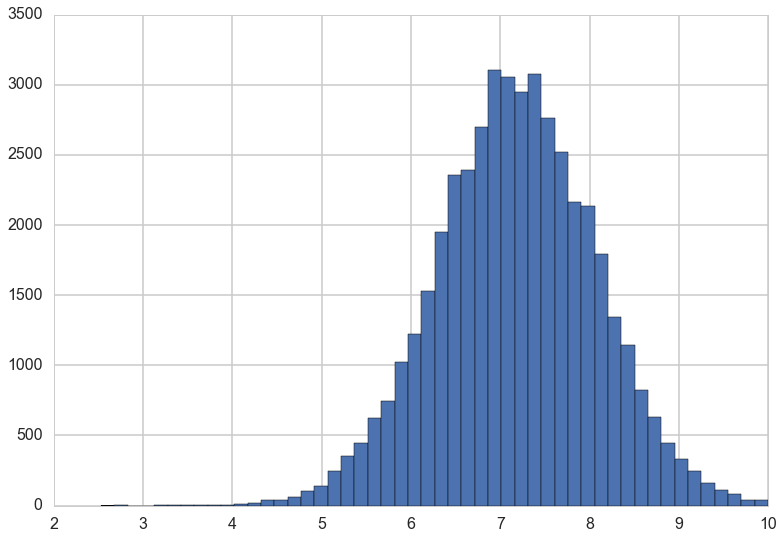

In [215]:
a_hist = plt.hist(alpha.trace(), bins=50)
a_map_index = np.argmax(a_hist[0])
a_hist_bin_middle = 0.5*a_hist[1][:-1] + 0.5*a_hist[1][1:]
a_map = a_hist_bin_middle[a_map_index]
print "Alpha MAP value is:",a_map

In [216]:
# Here is the data
rt_pixar_list = []
for movie in pixar_raw['rotten tomatoes']:
    rt_pixar_list.append((np.mean(pixar_raw['rotten tomatoes'][movie]), np.std(pixar_raw['rotten tomatoes'][movie])))
    
data = np.double(np.array(rt_pixar_list))
#data = np.double(np.array([[29.5,18.4],[6.3,12.7],[-3.9,15.9],[7.2,10.2],[-2.1,9.0],[1.8,12.1],[19.6,7.3],[12,18.6]]))
data_means = data[:,0]
data_std = data[:,1]

theta_list = []


alpha = pm.Uniform("alpha", 0., 10.0)
beta = pm.Uniform("beta", 2., 20.0)

for x in range(len(data_means)):
    theta = pm.Normal("theta"+str(x), mu = alpha, tau = 1./beta)

    theta_list.append(theta)

    
print len(theta_list)

#Normal
likelihood = pm.Normal('likelihood',mu=[theta_list], tau=1./data_std**2,value=data_means,observed=True)

parameterlist = [alpha, beta, likelihood]
parameterlist.extend(theta_list)
response_model=pm.Model(parameterlist)
mcmc = pm.MCMC(response_model)
mcmc.sample(iter=100000, burn=10000, thin = 2)

10
 [-----------------100%-----------------] 100000 of 100000 complete in 40.6 sec

Alpha MAP value is: 7.85796360703


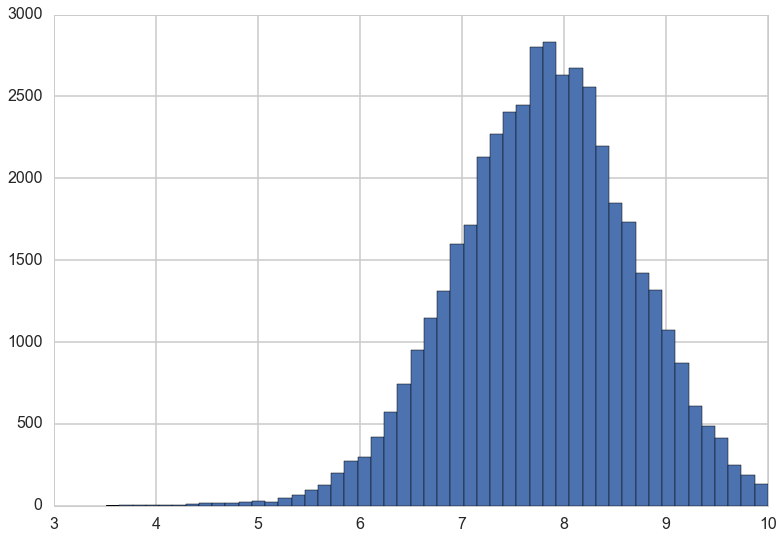

In [217]:
a_hist = plt.hist(alpha.trace(), bins=50)
a_map_index = np.argmax(a_hist[0])
a_hist_bin_middle = 0.5*a_hist[1][:-1] + 0.5*a_hist[1][1:]
a_map = a_hist_bin_middle[a_map_index]
print "Alpha MAP value is:",a_map